c:\Users\KJH\AppData\Local\anaconda3\envs\mlops\Lib\site-packages\skimage\transform\radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


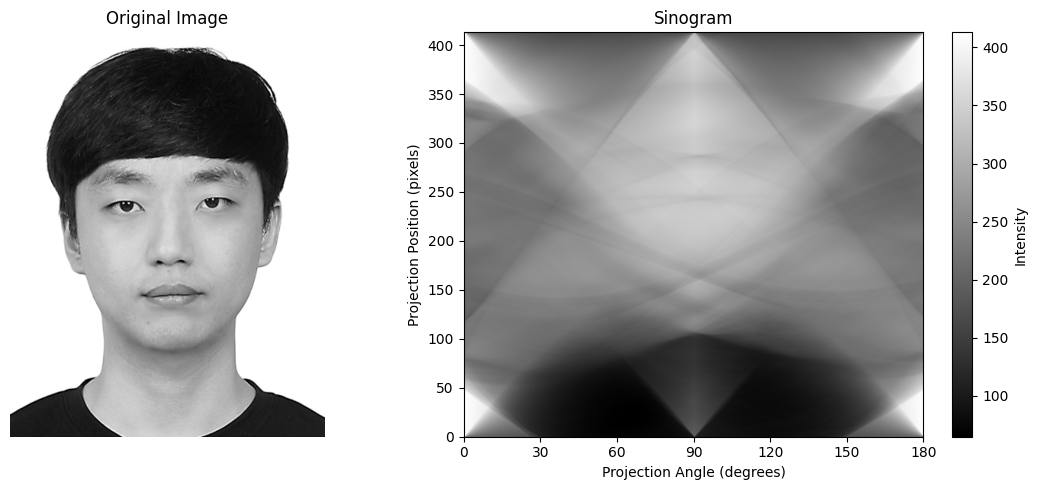

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import radon

# 1. 이미지 불러오기
image_path = r"C:/Users/KJH/Code_Document/230529김지후.jpg"
image = io.imread(image_path)

# 2. Grayscale 변환
gray_image = color.rgb2gray(image)

# 3. Radon 변환 수행 (Sinogram 생성)
theta = np.linspace(0., 180., max(gray_image.shape), endpoint=False)  # 0° ~ 180°
sinogram = radon(gray_image, theta=theta, circle=True)

# 4. 결과 출력
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 원본 이미지
ax1.set_title("Original Image")
ax1.imshow(gray_image, cmap="gray")
ax1.axis("off")

# Sinogram 출력
ax2.set_title("Sinogram")
cax = ax2.imshow(sinogram, cmap="gray", aspect='auto',
                 extent=[0, 180, 0, sinogram.shape[0]])  # X축을 0-180°로 설정
ax2.set_xlabel("Projection Angle (degrees)")
ax2.set_ylabel("Projection Position (pixels)")
ax2.set_xticks(np.linspace(0, 180, num=7))  # 0, 30, 60, 90, 120, 150, 180 등으로 표시
fig.colorbar(cax, ax=ax2, label="Intensity")

plt.tight_layout()
plt.show()
